<a href="https://colab.research.google.com/github/donhertztech/IBMDataScience/blob/main/House_Sales_in_King_County%2C_USA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Project: House Sales in King County, USA**

**Instructions**

In this assignment, you are a Data Analyst working at a Real Estate Investment Trust. The Trust would like to start investing in Residential real estate. You are tasked with determining the market price of a house given a set of features. You will analyze and predict housing prices using attributes or features such as square footage, number of bedrooms, number of floors, and so on. This is a template notebook; your job is to complete the ten questions. Some hints to the questions are given.

As you are completing this notebook, take and save the screenshots of the final outputs of your solutions (e.g., final charts, tables, calculation results etc.). They will need to be shared in the following Peer Review section of the Final Project module.

**About the Dataset**

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. It was taken from here. It was also slightly modified for the purposes of this course.

**Import the required libraries**

All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.

!mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1

Note: If your environment doesn't support "!mamba install", use "!pip install"

In [6]:
# Suprimir warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# Instalar librerías (versiones compatibles con Colab)
!pip install pandas seaborn matplotlib scikit-learn

# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

print("¡Todas las librerías se instalaron e importaron correctamente!")

¡Todas las librerías se instalaron e importaron correctamente!


# **Module 1: Importing Data Sets**

Download the dataset by running the cell below.

In [9]:
import requests

def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)
        print(f"Archivo descargado: {filename}")
    else:
        print("Error al descargar el archivo")

# URL del archivo
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'

# Descargar el archivo
download(filepath, "housing.csv")
file_name = "housing.csv"

Archivo descargado: housing.csv


Load the csv:

In [11]:
df = pd.read_csv(file_name)
print(df.head())  # Verificar que los datos se cargaron

   Unnamed: 0          id             date     price  bedrooms  bathrooms  \
0           0  7129300520  20141013T000000  221900.0       3.0       1.00   
1           1  6414100192  20141209T000000  538000.0       3.0       2.25   
2           2  5631500400  20150225T000000  180000.0       2.0       1.00   
3           3  2487200875  20141209T000000  604000.0       4.0       3.00   
4           4  1954400510  20150218T000000  510000.0       3.0       2.00   

   sqft_living  sqft_lot  floors  waterfront  ...  grade  sqft_above  \
0         1180      5650     1.0           0  ...      7        1180   
1         2570      7242     2.0           0  ...      7        2170   
2          770     10000     1.0           0  ...      6         770   
3         1960      5000     1.0           0  ...      7        1050   
4         1680      8080     1.0           0  ...      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955       

Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply skip the steps above, and simply use the URL directly in the pandas.read_csv() function. You can uncomment and run the statements in the cell below.

# **Question 1**

Display the data types of each column using the function dtypes. Take a screenshot of your code and output. You will need to submit the screenshot for the final project.

In [12]:
print(df.dtypes)

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [13]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# **Module 2: Data Wrangling**

# **Question 2**

Drop the columns "id" and "Unnamed: 0" from axis 1 using the method drop(), then use the method describe() to obtain a statistical summary of the data. Make sure the inplace parameter is set to True. Take a screenshot of your code and output. You will need to submit the screenshot for the final project.

In [14]:
# Drop the columns "id" and "Unnamed: 0" from axis 1 with inplace=True
df.drop(['id', 'Unnamed: 0'], axis=1, inplace=True)

# Get statistical summary of the data
stats_summary = df.describe()

# Display the summary
stats_summary

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


We can see we have missing values for the columns  bedrooms and  bathrooms

In [15]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


We can replace the missing values of the column 'bedrooms' with the mean of the column 'bedrooms'  using the method replace(). Don't forget to set the inplace parameter to True

In [16]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

We also replace the missing values of the column 'bathrooms' with the mean of the column 'bathrooms'  using the method replace(). Don't forget to set the  inplace  parameter top  True

In [17]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


# **Module 3: Exploratory Data Analysis**

# **Question 3**

Use the method value_counts to count the number of houses with unique floor values, use the method .to_frame() to convert it to a data frame. Take a screenshot of your code and output. You will need to submit the screenshot for the final project.

In [18]:
# Count unique floor values and convert to DataFrame
floor_counts = df['floors'].value_counts().to_frame()
floor_counts

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


# **Question 4**

Use the function boxplot in the seaborn library to determine whether houses with a waterfront view or without a waterfront view have more price outliers. Take a screenshot of your code and boxplot. You will need to submit the screenshot for the final project.

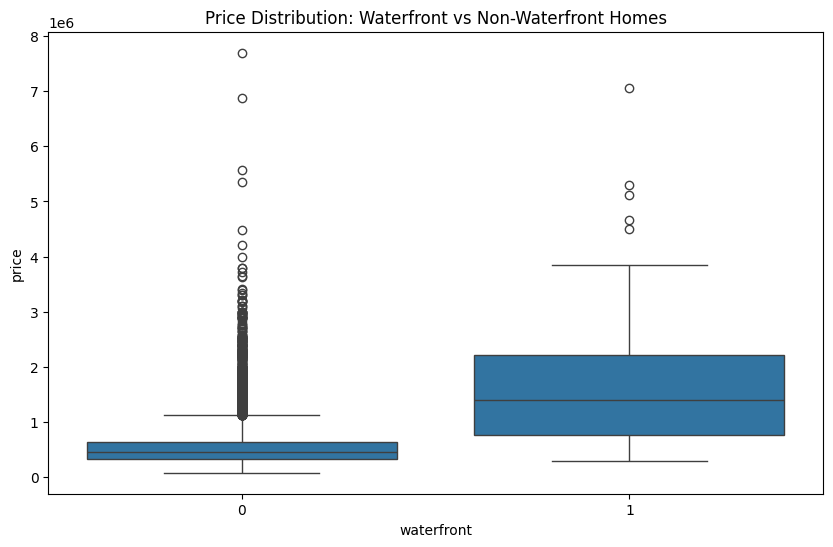

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='waterfront', y='price', data=df)
plt.title('Price Distribution: Waterfront vs Non-Waterfront Homes')
plt.show()

# **Question 5**

Use the function regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price. Take a screenshot of your code and scatterplot. You will need to submit the screenshot for the final project.

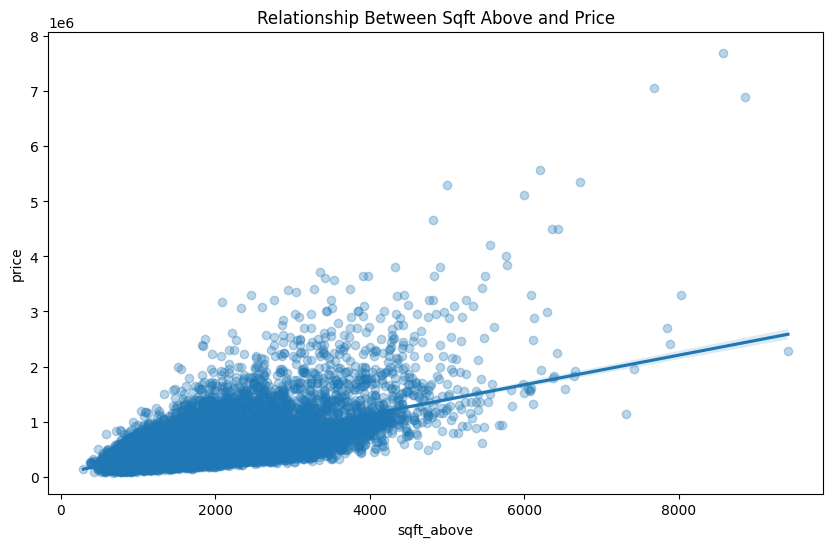

In [20]:
# Create regression plot
plt.figure(figsize=(10, 6))
sns.regplot(x='sqft_above', y='price', data=df, scatter_kws={'alpha':0.3})
plt.title('Relationship Between Sqft Above and Price')
plt.show()

In [21]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.corr()['price'].sort_values()

,price
zipcode,-0.053203
long,0.021626
condition,0.036362
yr_built,0.054012
sqft_lot15,0.082447
sqft_lot,0.089661
yr_renovated,0.126434
floors,0.256794
waterfront,0.266369
lat,0.307003


# **Module 4: Model Development**

We can Fit a linear regression model using the longitude feature 'long' and caculate the R^2.

In [22]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

# **Question 6**

Fit a linear regression model to predict the 'price' using the feature 'sqft_living' then calculate the R^2. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.

In [23]:
from sklearn.linear_model import LinearRegression

# Single-feature model
X = df[['sqft_living']]
y = df['price']
lr = LinearRegression()
lr.fit(X, y)
r2_single = lr.score(X, y)
print(f"R-squared: {r2_single:.4f}")

R-squared: 0.4929


# **Question 7**

Fit a linear regression model to predict the 'price' using the list of features:

features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]

Then calculate the R^2. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.

In [24]:
# Multi-feature model
features = ["floors", "waterfront", "lat", "bedrooms",
           "sqft_basement", "view", "bathrooms",
           "sqft_living15", "sqft_above", "grade", "sqft_living"]

X_multi = df[features]
y = df['price']

lr_multi = LinearRegression()
lr_multi.fit(X_multi, y)
r2_multi = lr_multi.score(X_multi, y)
print(f"R-squared: {r2_multi:.4f}")

R-squared: 0.6577


This will help with Question 8

Create a list of tuples, the first element in the tuple contains the name of the estimator:

'scale'

'polynomial'

'model'

The second element in the tuple contains the model constructor

StandardScaler()

PolynomialFeatures(include_bias=False)

LinearRegression()

Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

# **Question 8**

Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list features, and calculate the R^2. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Create pipeline
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(include_bias=False)),
    ('model', LinearRegression())
])

# Fit and score
pipe.fit(X_multi, y)
r2_pipe = pipe.score(X_multi, y)
print(f"R-squared (Pipeline): {r2_pipe:.4f}")

R-squared (Pipeline): 0.7513


# **Module 5: Model Evaluation and Refinement**

Import the necessary modules:

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


We will split the data into training and testing sets:

In [27]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


# **Question 9**

Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.

In [28]:
from sklearn.linear_model import Ridge

In [29]:
# Create and fit Ridge regression model
ridge = Ridge(alpha=0.1)
ridge.fit(x_train, y_train)

# Calculate R² on test data
ridge_r2 = ridge.score(x_test, y_test)
print(f"R-squared (Ridge Regression): {ridge_r2:.4f}")

R-squared (Ridge Regression): 0.6479


# **Question 10**

Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided. Take a screenshot of your code and the R^2. You will need to submit it for the final project.

In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# Create polynomial features (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

# Ridge regression with polynomial features
ridge_poly = Ridge(alpha=0.1)
ridge_poly.fit(x_train_poly, y_train)

# Calculate R² on test data
y_pred = ridge_poly.predict(x_test_poly)
r2_poly = r2_score(y_test, y_pred)

print(f"R-squared (Polynomial Ridge): {r2_poly:.4f}")

R-squared (Polynomial Ridge): 0.7003
